In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Esercizio 1: espressioni facciali
Il file `faces.csv` contiene i dati di 2000 facce di diverse persone. Per ciascun faccia nel dataset è presente il tipo di espressione facciale e un'immagine dell'intero viso.
- la colonna *emotions* descrive il tipo di espressione facciale (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral), 
- la colonna *pixels* contiene una immagine di 48x48pixel della espressione facciale. La colonna contiene i 2304=48x48 valori interi che rappresentano le intensità di grigio dei pixel dell'immagine.


1) Realizzare una sola figura nella quale per ogni tipo di espressione facciale siano visualizzate 5 facce scelte a caso tra quelle aventi quel tipo di espressione. Utilizzare la colormap più idonea.

In [7]:
espressioni = ("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral")

In [8]:
facce = pd.read_csv("./faces.csv")
facce

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
1995,0,91 115 65 53 99 78 68 90 41 31 70 97 116 129 1...
1996,2,68 48 60 66 53 47 63 77 107 117 95 95 153 201 ...
1997,5,253 253 254 247 171 144 133 145 114 74 90 111 ...
1998,0,26 26 25 25 26 26 26 28 26 27 36 61 77 72 79 7...


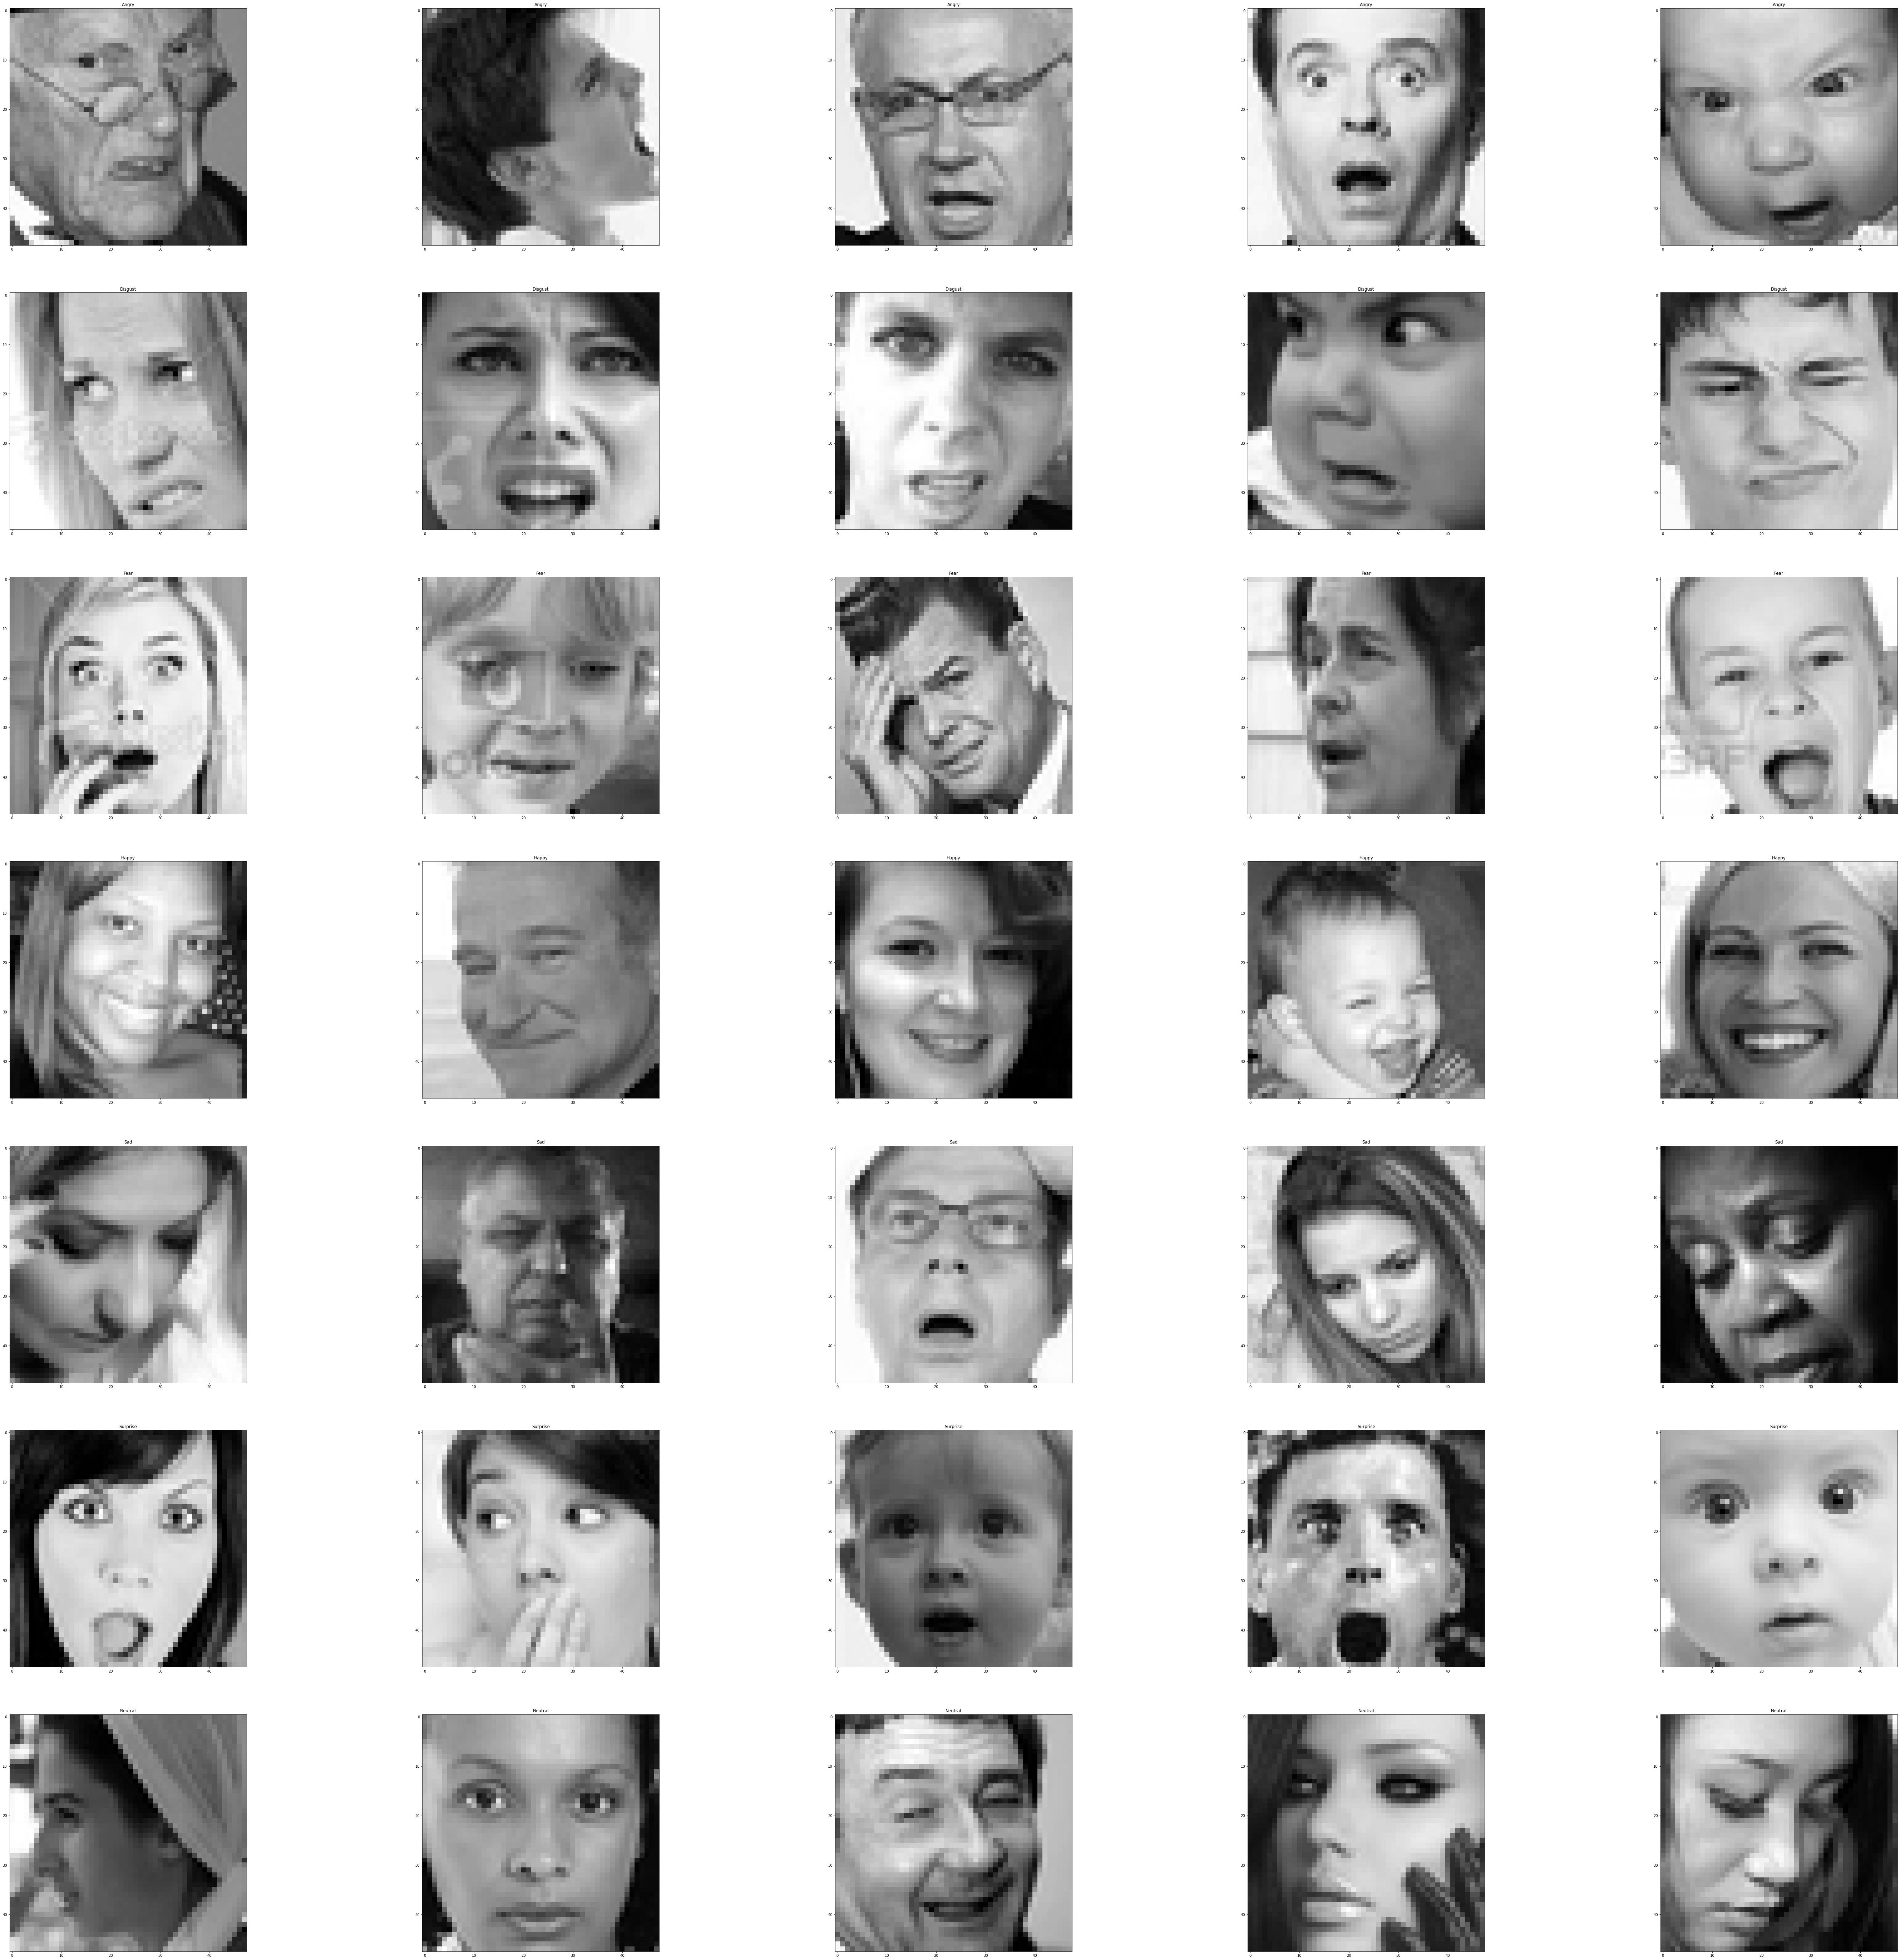

In [12]:
fig, axs = plt.subplots(nrows = 7, ncols = 5, figsize = (100, 100))

for n_espressione, nome_espressione in enumerate(espressioni) :
    for x in range(5):
        # ho tutti i pixel delle facce di un tipo, e con np.random.choice ne seleziono una a caso
        pixels_faccia_stringa = np.random.choice(facce[facce["emotion"] == n_espressione]["pixels"])
        # splitto lo spazio per ottenere i singoli numeri e lo converto in array numpy
        pixels_faccia_stringa = np.array(pixels_faccia_stringa.split(" ")).astype(float)
        
        axs[n_espressione, x].imshow(pixels_faccia_stringa.reshape((48, 48)), cmap = "gist_gray")
        axs[n_espressione, x].set_title(nome_espressione)
        
plt.show()

# Esercizio 2: Olimpiadi Invernali 2022
Il file `medals.csv` contiene tutte le medaglie assegnate sinora alle Olimpiadi Invernali 2022, mentre il file `athletes.csv` contiene tutti gli atleti iscritti alle Olimpiadi con alcune loro informazioni anagrafiche. Rispondi alle seguenti domande utilizzando pandas e matplotlip.

1) Nei due file sono presenti valori mancanti?

2) Quali sono i 5 paesi che hanno vinto più medaglie?

3) Rappresenta la distribuzione delle medaglie rispetto al loro tipo, per i 5 paesi del punto 1, mediante un grafico a barre.

4) Utilizza un histogramma o un diagramma a barre per rappresentare come gli atleti italiani sono suddivisi tra le diverse discipline a cui partecipano.

5) Aggrega i dati degli atleti per `country_code` e `discipline_code` in modo da visualizzare quanti atleti di ogni nazione partecipano in ogni disciplina: salva i dati su un file .csv.

6) **BONUS** C'è qualche atleta italiano nato a Milano che ha vinto una medaglia? In caso affermativo chi?



In [13]:
athletes = pd.read_csv("./athletes.csv")
medals = pd.read_csv("./medals.csv")

In [14]:
# punto 1
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892 entries, 0 to 2891
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               2892 non-null   object
 1   short_name         2892 non-null   object
 2   gender             2892 non-null   object
 3   birth_date         2889 non-null   object
 4   birth_place        2621 non-null   object
 5   birth_country      2740 non-null   object
 6   country            2892 non-null   object
 7   country_code       2892 non-null   object
 8   discipline         2889 non-null   object
 9   discipline_code    2892 non-null   object
 10  residence_place    2445 non-null   object
 11  residence_country  2599 non-null   object
 12  height_m/ft        727 non-null    object
 13  url                2892 non-null   object
dtypes: object(14)
memory usage: 316.4+ KB


In [15]:
# punto 1
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   medal_type          448 non-null    object
 1   medal_code          448 non-null    int64 
 2   medal_date          448 non-null    object
 3   athlete_short_name  448 non-null    object
 4   athlete_name        448 non-null    object
 5   athlete_sex         448 non-null    object
 6   athlete_link        448 non-null    object
 7   event               448 non-null    object
 8   country             448 non-null    object
 9   country_code        448 non-null    object
 10  discipline          448 non-null    object
 11  discipline_code     448 non-null    object
dtypes: int64(1), object(11)
memory usage: 42.1+ KB


In [19]:
# punto 2
top5 = medals["country_code"].value_counts().head(5)
top5

ROC    52
NOR    41
GER    38
USA    34
CAN    30
Name: country_code, dtype: int64

<AxesSubplot:>

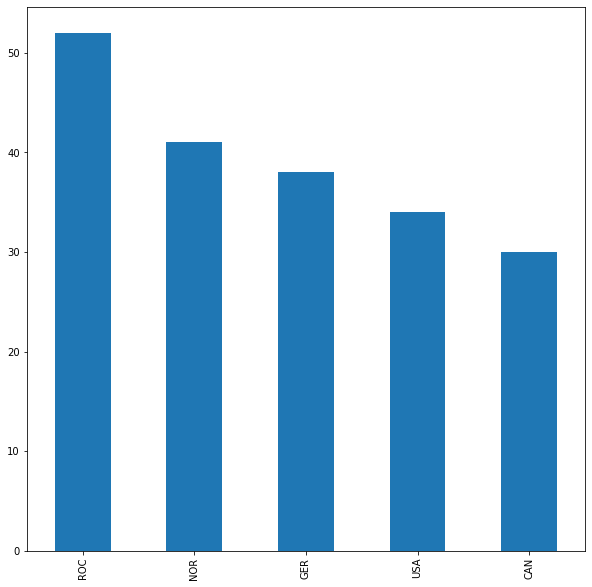

In [23]:
# punto 3
fig, ax = plt.subplots(figsize = (10, 10))

top5.plot.bar(ax = ax)

In [26]:
# punto 4
ita_atl = athletes[(athletes["country_code"] == "ITA")]["discipline"]

ita_dist = 

36      Figure Skating
49           Bobsleigh
72             Curling
102           Skeleton
103          Snowboard
             ...      
2659          Biathlon
2663              Luge
2744          Biathlon
2757          Biathlon
2877              Luge
Name: discipline, Length: 119, dtype: object

In [29]:
# punto 5
athletes[["country_code", "discipline_code"]].groupby("country_code").size()
athletes.to_csv("aggr_punt5.csv")

In [35]:
# punto 6
atletiDiMilano = athletes[athletes["birth_place"] == "MILAN"].values
atletiDiMilano

array([['BRIGNONE Federica', 'BRIGNONE F', 'Female', '1990-07-14',
        'MILAN', 'Italy', 'Italy', 'ITA', 'Alpine Skiing', 'ALP',
        'LA SALLE', 'Italy', nan,
        '../../../en/results/alpine-skiing/athlete-profile-n1015230-federica-brignone.htm'],
       ['DOTTI Tommaso', 'DOTTI T', 'Male', '1993-07-11', 'MILAN',
        'Italy', 'Italy', 'ITA', 'Short Track Speed Skating', 'STK',
        'BORMIO', 'Italy', nan,
        '../../../en/results/short-track-speed-skating/athlete-profile-n1034962-tommaso-dotti.htm'],
       ['FABBRI Marco', 'FABBRI M', 'Male', '1988-02-02', 'MILAN',
        'Italy', 'Italy', 'ITA', 'Figure Skating', 'FSK', 'MILAN',
        'Italy', nan,
        '../../../en/results/figure-skating/athlete-profile-n1035059-marco-fabbri.htm'],
       ['FERRARI Filippo', 'FERRARI F', 'Male', '1999-12-04', 'MILAN',
        'Italy', 'Italy', 'ITA', 'Snowboard', 'SBD', 'GRAUNO', 'Italy',
        nan,
        '../../../en/results/snowboard/athlete-profile-n1015265-filipp

In [36]:
atletiCheHannoUnaMedaglia = medals["athlete_name"].values

for nome in atletiCheHannoUnaMedaglia:
    if nome in atletiDiMilano:
        print(nome)

BRIGNONE Federica
DOTTI Tommaso


# Esercizio 3: i dati di Netflix - completato
Il file `Netflix-Dataset-Latest-2021.xlsx` contiene svariati dati di film e serie Netflix.

1) In media hanno uno score maggiore (`IMDb Score`) i film/serie che durano meno di 30 minuti oppure quelli che durano più di 2h?

2) Utilizza matplotlib creare un grafico a dispersione che mostri la correlazione tra `IMDb Score` e `Awards Received`. I punti del grafico devono avere un colore che dipenda dal numero di voti ricevuti `IMDb Votes`. I grafici devono avere titolo, griglia ed etichette sugli assi.

3) **BONUS**: traccia lo stesso grafico facendo in modo che la dimensione dei punti sia proporzionale al numero di voti `IMDb Votes`.

In [39]:
netflix = pd.read_excel("./Netflix-Dataset-Latest-2021.xlsx")
netflix

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,Unnamed: 29,Unnamed: 30
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube,NaN,NaN
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube,NaN,NaN
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube,NaN,NaN
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9420,13 Going on 30,"Comedy, Fantasy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...","English, Portuguese",Movie,3.1,"Hungary,Lithuania,Romania,United Kingdom,Belgi...",1-2 hour,Gary Winick,"Josh Goldsmith, Cathy Yuspa",...,https://www.netflix.com/watch/60034573,https://www.imdb.com/title/tt0337563,When a geeky teens birthday party goes awry an...,167842.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=SApIKVq1iJQ,YouTube,NaN,NaN
9421,LIFE 2.0,Documentary,"Social & Cultural Documentaries,Biographical D...",English,Movie,8.2,"Hungary,Lithuania,India,Australia,United Kingd...",1-2 hour,Jason Spingarn-Koff,NaN,...,https://www.netflix.com/watch/70129457,https://www.imdb.com/title/tt1518809,Computer users across the globe log onto the v...,878.0,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=2TY-O5Dc8oA,YouTube,NaN,NaN
9422,Brand New Day,"Documentary, Music","Australian Comedies,Romantic Comedies,Australi...",English,Movie,8.6,Australia,1-2 hour,Amos Gitai,NaN,...,https://www.netflix.com/watch/70125340,NaN,In an idyllic port town on Australias west coa...,14.0,http://cdn1.nflximg.net/images/5543/12045543.jpg,NaN,https://www.youtube.com/watch?v=RnGRdaX594k,YouTube,NaN,NaN
9423,Daniel Are

In [40]:
# punto 1
dur_min30 = netflix[(netflix["Runtime"] == "< 30 minutes")]["IMDb Score"].mean()
dur_h2 = netflix[(netflix["Runtime"] == "> 2 hrs")]["IMDb Score"].mean()

if dur_min30 > dur_h2:
    print("I film/serie di < 30 minutes hanno una media + alta")
else :
    print("I film/serie di > 2 hrs hanno una media + alta")

I film/serie di < 30 minutes hanno una media + alta


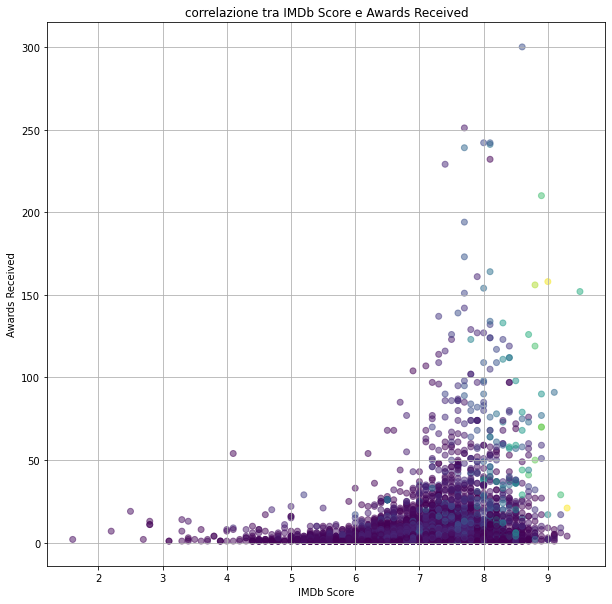

In [45]:
# punto 2
x = netflix["IMDb Score"].values
y = netflix["Awards Received"].values
votes = netflix["IMDb Votes"].values

fig, ax = plt.subplots(figsize = (10, 10))

ax.scatter(x, y, c = votes, alpha = 0.5)

ax.set_title("correlazione tra IMDb Score e Awards Received")
ax.set_xlabel("IMDb Score")
ax.set_ylabel("Awards Received")
ax.grid()

plt.show()

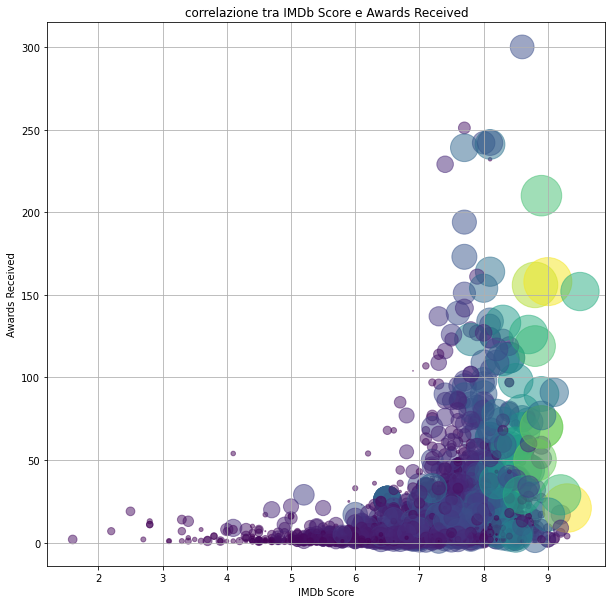

In [43]:
# BONUS
size = votes /1000

fig, ax = plt.subplots(figsize = (10, 10))

ax.scatter(x, y, s = size, c = votes, alpha = 0.5)

ax.set_title("correlazione tra IMDb Score e Awards Received")
ax.set_xlabel("IMDb Score")
ax.set_ylabel("Awards Received")
ax.grid()

plt.show()